<a href="https://colab.research.google.com/github/Akbar-fitriawan/tutorial-machine-learning/blob/main/DecisionTreeClassifier(sedan%20dan%20minibus).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [67]:
import pandas as pd


### Genarate Data

In [68]:
df1 = pd.read_csv('/content/decisiontree_ch6.csv')

encoding = {
    'mesin': {
        'bensin': 0,
        'diesel': 1
        },

    'penggerak': {
        'depan': 0,
        'belakang': 1,
    }
}

df1.replace(encoding, inplace=True)

In [69]:
print(df1)

    ID  mesin  bangku  penggerak    label
0    1      0       4          0    sedan
1    2      0       2          0    sedan
2    3      0       8          1  minibus
3    4      1       6          0  minibus
4    5      0       5          1  minibus
5    6      1       8          1  minibus
6    7      1       8          1  minibus
7    8      0       4          0    sedan
8    9      1       7          1  minibus
9   10      0       4          0    sedan
10  11      0       2          0    sedan
11  12      1       6          1  minibus
12  13      1       8          0  minibus
13  14      0       4          0    sedan
14  15      1       2          0    sedan
15  16      0       4          0    sedan
16  17      0       8          1  minibus
17  18      0       4          0    sedan
18  19      1       8          1  minibus
19  20      1       8          1  minibus
20  21      0       4          0    sedan
21  22      0       4          0  minibus
22  23      1       8          1  

In [70]:
X = df1.drop(['ID','label'], axis=1)
y = df1['label']

### seleksi data

In [71]:
import sklearn.model_selection as ms
X_train,X_test,y_train,y_test = ms.train_test_split(X,y, test_size=0.2,)

### Decision Tree
Entropy

In [72]:
import sklearn.tree as tree
model_1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5) # seleksi entropy (ukuran seberapa acak isi kelas)
model_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

### prediksi model

In [73]:
y_prediksi = model_1.predict(X_test)
print(y_prediksi)

['sedan' 'sedan' 'minibus' 'sedan' 'minibus' 'sedan' 'sedan' 'minibus']


### accuracy model

In [74]:
import sklearn.metrics as met
print(met.accuracy_score(y_test,y_prediksi))

0.875


In [75]:
import pydotplus as pp
from IPython.display import Image, display
labels = ['mesin','bangku','penggerak']
dot_data = tree.export_graphviz(model_1, out_file=None,
                                feature_names=labels, filled=True, rounded=True)
graph = pp.graph_from_dot_data(dot_data)
graph.write_png('decisiontree.png')

True

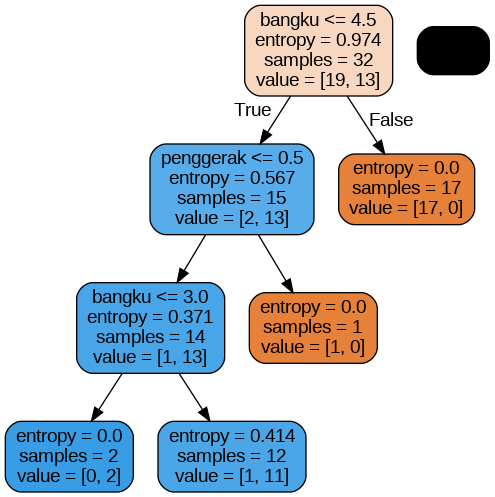

In [76]:
img = Image(filename="/content/decisiontree.png")
display(img)

Gini Index

In [77]:
model_1 = tree.DecisionTreeClassifier(criterion='gini', max_depth=5) # gini
model_1.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5)

In [78]:
y_prediksi = model_1.predict(X_test)
print(y_prediksi)

['sedan' 'sedan' 'minibus' 'sedan' 'minibus' 'sedan' 'sedan' 'minibus']


In [79]:
print(met.accuracy_score(y_test,y_prediksi))

0.875


*Score accuracy sama antara Entropy dan gini 0,875(87,5%)*

# Visualisasi

In [80]:
import pydotplus as pp
from IPython.display import Image, display
labels = ['mesin','bangku','penggerak']
dot_data = tree.export_graphviz(model_1, out_file=None,
                                feature_names=labels, filled=True, rounded=True)
graph = pp.graph_from_dot_data(dot_data)
graph.write_png('decisiontree.png')

True

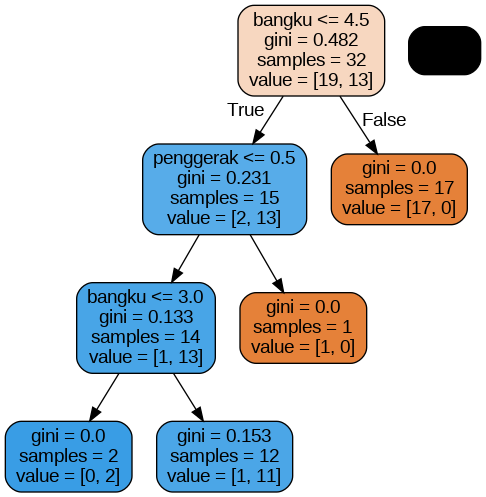

In [81]:
img = Image(filename="/content/decisiontree.png")
display(img)